## Gaussian mixture model 
Solved with the EM algorithm, see my [blog](https://www.mazhixian.me/2018/03/13/expectation-maximization-algorithm/) for details.

In this notebook, a two-dimension GMM model is generated and estimated

In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import gmm_utils as utils

## Generation

In [4]:
num_gauss = 3
alpha = [0.3, 0.5, 0.2]
theta = np.array([[0.3, 2.4, 4.2, 1.3, 10.0, 1.3],
                 [0.6, 1.1, 5.5, 1.5, 3.4, 0.5]])
numsample = 100000

y1,y2 = utils.gmm_gen_2d(num_gauss,alpha,theta,numsample)

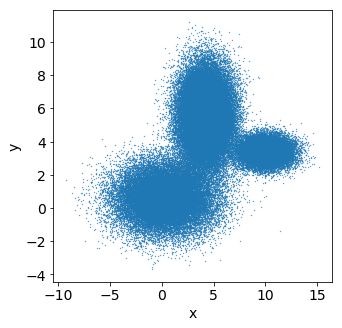

In [5]:
plt.rcParams["figure.figsize"] = [5.0, 5.0]

plt.scatter(y1,y2, s=0.1)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)

## Estimation

In [6]:
y = np.vstack([y1,y2]).T
alpha_est_r, theta_est_r = utils.gmm_est_2d(y, num_gauss, num_iter=200)

Initialized parameters
alpha: [0.33333333 0.33333333 0.33333333]
mu1   : [0.91752249 0.78497663 0.54902461]
sigma1: [0.54432983 0.04717855 0.94532387]
mu2   : [0.05611971 0.67762191 0.06034915]
sigma2: [0.17354022 0.07777685 0.99657416]


In [7]:
init_param = {"alpha": np.array([0.3, 0.5, 0.2]),
              "theta": np.array(
                  [[0.3, 1.4, 4.2, 1.3, 9.0, 1.1],
                   [0.6, 1.1, 5.5, 1.5, 4.2, 1.1]])
             }
y = np.vstack([y1,y2]).T
alpha_est, theta_est = utils.gmm_est_2d(y, num_gauss, init_param=init_param, num_iter=100)

Initialized parameters
alpha: [0.3 0.5 0.2]
mu1   : [0.3 4.2 9. ]
sigma1: [1.4 1.3 1.1]
mu2   : [0.6 5.5 4.2]
sigma2: [1.1 1.5 1.1]


In [8]:
print("Parameters raw:\n", alpha, theta)
print("Parameters est:\n", alpha_est, theta_est)
print("Parameters est ramdom:\n", alpha_est_r, theta_est_r)

Parameters raw:
 [0.3, 0.5, 0.2] [[ 0.3  2.4  4.2  1.3 10.   1.3]
 [ 0.6  1.1  5.5  1.5  3.4  0.5]]
Parameters est:
 [0.29918112 0.50085952 0.19995936] [[0.29592468 2.41688794 4.19597778 1.30526892 9.99286011 1.30796842]
 [0.60301918 1.1006169  5.50858378 1.49247175 3.39812885 0.50176786]]
Parameters est ramdom:
 [0.26937903 0.00380169 0.72681928] [[ 0.10120577  2.32749268 -0.10035937  0.84567839  5.72551571  2.98216422]
 [ 0.46796868  1.02727034  1.58234214  0.39932001  4.79740953  1.684869  ]]


In [9]:
def gen_gauss_2d(numsample, mu, sigma):
    return sigma * np.random.randn(numsample,2) + mu

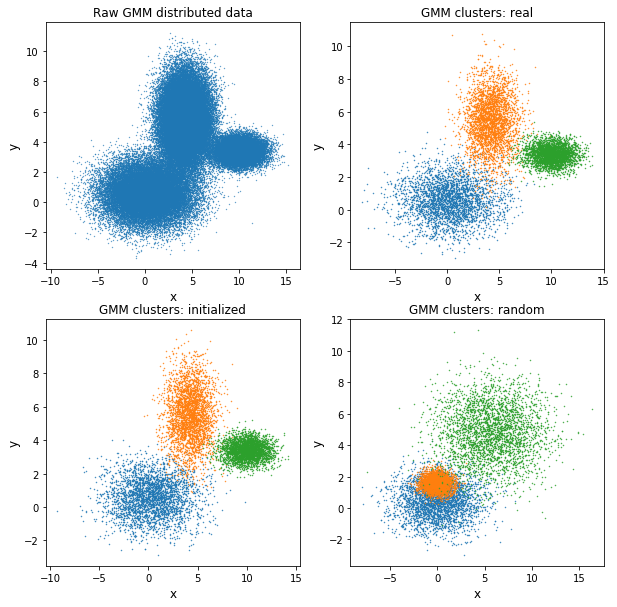

In [11]:
# Compare
from matplotlib import gridspec

plt.rcParams["figure.figsize"] = [10.0, 10.0]
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1])
# Plot the distributions
numsample = 3000

ax0 = plt.subplot(gs[0])
ax0.scatter(y1,y2,s=0.1)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Raw GMM distributed data")
# plt.legend(["GMM1", "GMM2", "GMM2"], fontsize=12)

ax1 = plt.subplot(gs[1])
for i in range(num_gauss):
    data = gen_gauss_2d(numsample, theta[:,i*2], theta[:,i*2+1])
    ax1.scatter(data[:,0], data[:,1], s=0.2)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("GMM clusters: real")
# plt.legend(["GMM1", "GMM2", "GMM2"], fontsize=12)

ax2 = plt.subplot(gs[2])
for i in range(num_gauss):
    data = gen_gauss_2d(numsample, theta_est[:,i*2], theta_est[:,i*2+1])
    ax2.scatter(data[:,0], data[:,1], s=0.2)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("GMM clusters: initialized")
# plt.legend(["GMM1", "GMM2", "GMM2"], fontsize=12)

ax3 = plt.subplot(gs[3])
for i in range(num_gauss):
    data = gen_gauss_2d(numsample, theta_est_r[:,i*2], theta_est_r[:,i*2+1])
    ax3.scatter(data[:,0], data[:,1], s=0.2)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("GMM clusters: random")
# plt.legend(["GMM1", "GMM2", "GMM2"], fontsize=12)
plt.savefig("fig_gmm_2d.png", bbox_inches="tight", dpi=200)